In [36]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [37]:
# Load the data
df = pd.read_excel('System_Data_selected.xlsx')


# Check the first few rows of the DataFrame
df.head()


,Number,Gender,Age,Height (ft),Weight (kg),Eyes,Nose,Teeth,Scars,Limbs,...,Leadership,Obedience,Courage,Aptitude Test,Oral Interview,Blood pressure,Toxicology,Underlying condition,Selected,Year
0,1,Male,20,5.4,70,Normal,Normal,Normal,Normal,Normal,...,60,55,75,85,85,Normal,Positive,Negative,No,2022
1,2,Male,20,5.9,65,Normal,Normal,Abnormal,Normal,Normal,...,80,75,50,70,80,Normal,Negative,Positive,No,2022
2,3,Male,19,5.9,55,Normal,Normal,Normal,Normal,Normal,...,75,70,65,85,70,Normal,Negative,Negative,Yes,2022
3,4,Male,18,5.9,60,Normal,Normal,Abnormal,Normal,Normal,...,85,90,55,65,55,Normal,Negative,Negative,No,2022
4,5,Male,19,5.9,65,Normal,Normal,Normal,Normal,Normal,...,75,50,80,85,50,Normal,Positive,Negative,No,2022


In [38]:
# Replace 'no' with 'No' in the 'Selected' column
df['Selected'] = df['Selected'].replace('no', 'No')


In [39]:
df['Selected'].value_counts()

Selected
No     1854
Yes     450
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Selected'>

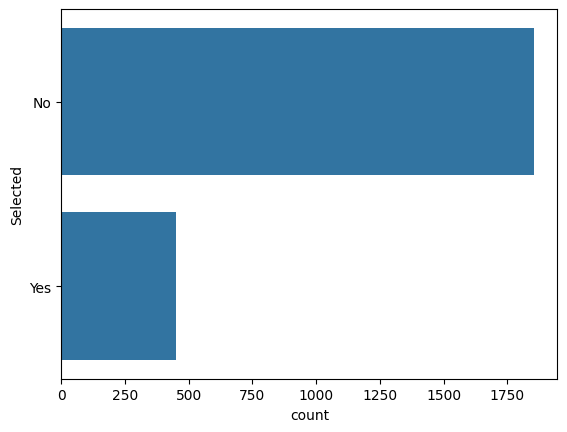

In [40]:
# Check the distribution of the target variable
sns.countplot(df['Selected'])

In [41]:
# Check for missing values
df.isnull().sum()


Number                  0
Gender                  0
Age                     0
Height (ft)             0
Weight (kg)             0
Eyes                    0
Nose                    0
Teeth                   0
Scars                   0
Limbs                   0
3 mile run              0
Sit ups                 0
Push ups                0
Leadership              0
 Obedience              0
Courage                 0
Aptitude Test           0
Oral Interview          0
Blood pressure          0
Toxicology              0
Underlying condition    0
Selected                0
Year                    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                2304 non-null   int64  
 1   Gender                2304 non-null   object 
 2   Age                   2304 non-null   int64  
 3   Height (ft)           2304 non-null   float64
 4   Weight (kg)           2304 non-null   int64  
 5   Eyes                  2304 non-null   object 
 6   Nose                  2304 non-null   object 
 7   Teeth                 2304 non-null   object 
 8   Scars                 2304 non-null   object 
 9   Limbs                 2304 non-null   object 
 10  3 mile run            2304 non-null   int64  
 11  Sit ups               2304 non-null   int64  
 12  Push ups              2304 non-null   int64  
 13  Leadership            2304 non-null   int64  
 14   Obedience            2304 non-null   int64  
 15  Courage              

In [43]:
df.rename(columns = {'Height (ft)':'Height',
                    'Weight (kg)':'Weight',
                    ' 3 mile run':'3_mile_run',
                    'Sit ups ':'Sit_ups ',
                    'Push ups':'Push_ups',
                    'Aptitude Test':'Aptitude_Test',
                    'Oral Interview':'Oral_Interview',
                    'Blood pressure':'Blood_pressure',
                    'Underlying condition':'Underlying_condition'}, inplace = True)

In [44]:
df[['Gender', 'Eyes', 'Nose', 'Teeth', 'Scars', 'Limbs', 'Blood_pressure', 'Toxicology', 'Underlying_condition', 'Selected']] = df[['Gender', 'Eyes', 'Nose', 'Teeth', 'Scars', 'Limbs', 'Blood_pressure', 'Toxicology', 'Underlying_condition', 'Selected']].astype(str)

In [45]:
# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [46]:
# Fill missing values with the median of the column
df.fillna(df.median(), inplace=True)



In [47]:
# Split the data into training and testing sets
X = df.drop('Selected', axis=1)
y = df['Selected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<Axes: >

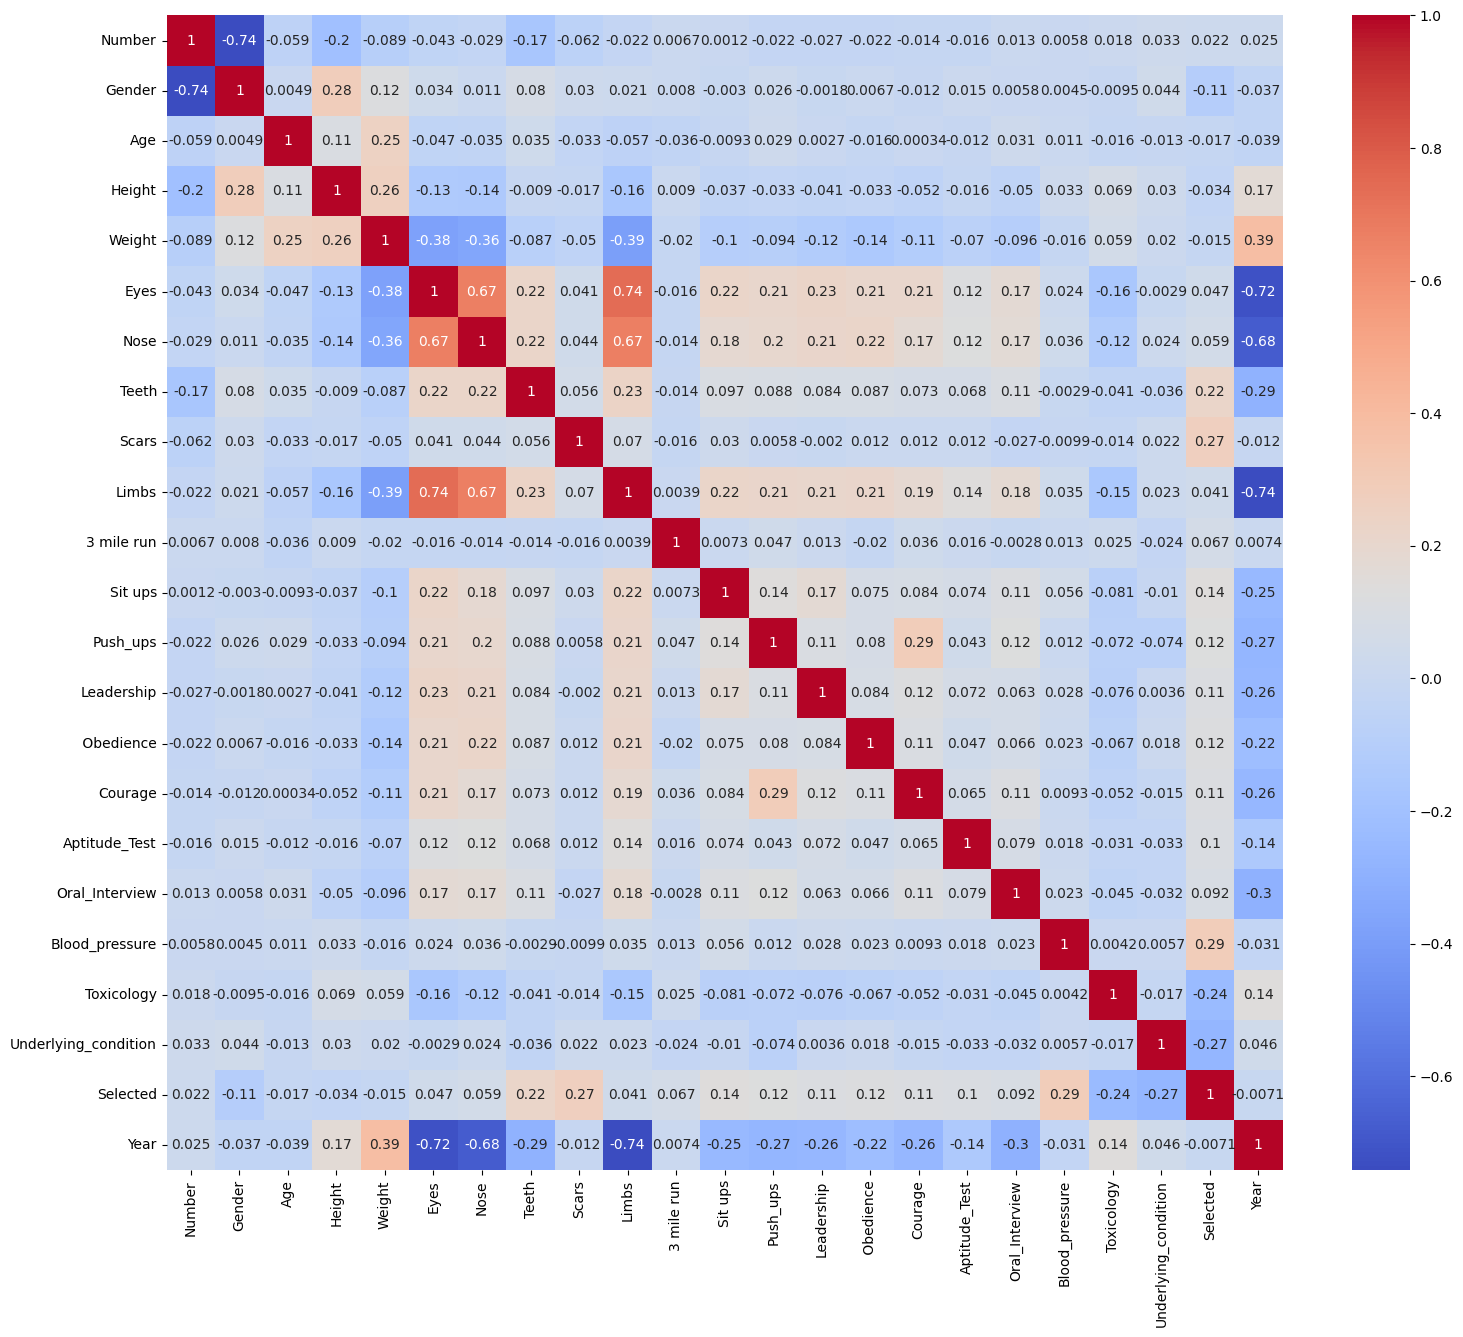

In [48]:
# Heatmap to show correlations
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')



array([[<Axes: title={'center': 'Number'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Eyes'}>,
        <Axes: title={'center': 'Nose'}>,
        <Axes: title={'center': 'Teeth'}>,
        <Axes: title={'center': 'Scars'}>,
        <Axes: title={'center': 'Limbs'}>],
       [<Axes: title={'center': '3 mile run'}>,
        <Axes: title={'center': 'Sit ups'}>,
        <Axes: title={'center': 'Push_ups'}>,
        <Axes: title={'center': 'Leadership'}>,
        <Axes: title={'center': ' Obedience'}>],
       [<Axes: title={'center': 'Courage'}>,
        <Axes: title={'center': 'Aptitude_Test'}>,
        <Axes: title={'center': 'Oral_Interview'}>,
        <Axes: title={'center': 'Blood_pressure'}>,
        <Axes: title={'center': 'Toxicology'}>],
       [<Axes: title={'center': 'Underlying_condition'}>,
        <Axes: title={'ce

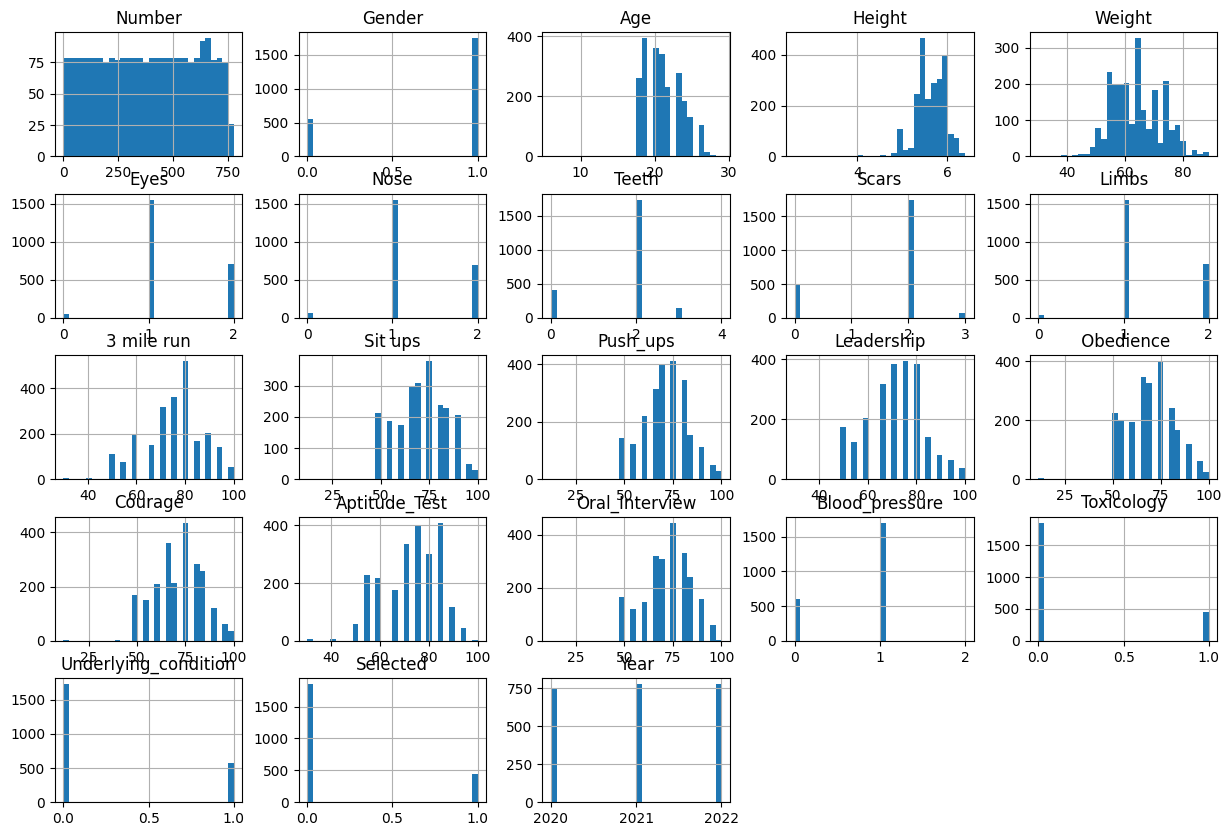

In [49]:
# Histograms for each variable
df.hist(bins=30, figsize=(15, 10))

In [50]:
# Pair plot
#sns.pairplot(df)
#plt.show()

In [51]:
# Build the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [52]:

# Get feature importances
importances = model.feature_importances_


In [53]:
# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})



In [54]:
# Sort the DataFrame to find out the most important features
feature_importances = feature_importances.sort_values("importance", ascending=False)



In [55]:
# Print the feature importances
print(feature_importances)



                 feature  importance
18        Blood_pressure    0.128242
20  Underlying_condition    0.119296
8                  Scars    0.114106
19            Toxicology    0.092986
7                  Teeth    0.080103
11               Sit ups    0.059758
14             Obedience    0.055776
13            Leadership    0.053547
12              Push_ups    0.040766
16         Aptitude_Test    0.040006
15               Courage    0.037731
10            3 mile run    0.034180
17        Oral_Interview    0.027328
0                 Number    0.023004
6                   Nose    0.018266
9                  Limbs    0.013725
4                 Weight    0.013067
2                    Age    0.012832
3                 Height    0.011442
21                  Year    0.010776
5                   Eyes    0.008701
1                 Gender    0.004363


In [56]:
# Make predictions
y_pred = model.predict(X_test)



In [57]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       380
           1       0.99      0.90      0.94        81

    accuracy                           0.98       461
   macro avg       0.98      0.95      0.97       461
weighted avg       0.98      0.98      0.98       461

[[379   1]
 [  8  73]]


In [58]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)



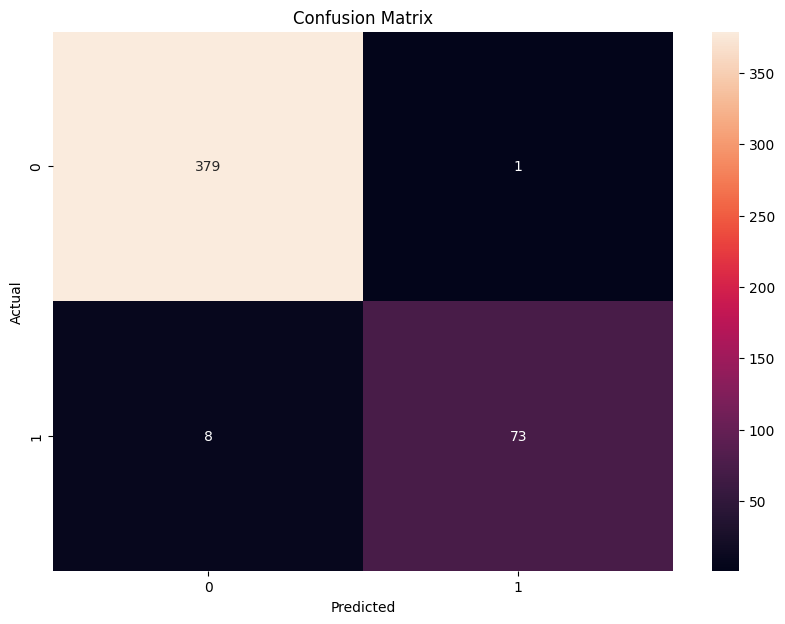

Cross-validation scores: [0.98481562 0.97830803 0.98264642 0.97613883 0.9673913 ]
Average cross-validation score: 0.9778600396114306


In [59]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

In [60]:
#save the model
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [61]:
new_df = df [['Blood_pressure','Scars',
              'Underlying_condition','Toxicology','Teeth','Height','Weight']]

In [62]:
from imblearn.over_sampling import SMOTE
# transform the dataset
#oversample = SMOTE()
#new_df, y = oversample.fit_resample(new_df, y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=23)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       380
           1       0.61      0.74      0.67        81

    accuracy                           0.87       461
   macro avg       0.78      0.82      0.80       461
weighted avg       0.88      0.87      0.88       461



In [64]:
print(confusion_matrix(y_test, y_pred))

[[342  38]
 [ 21  60]]


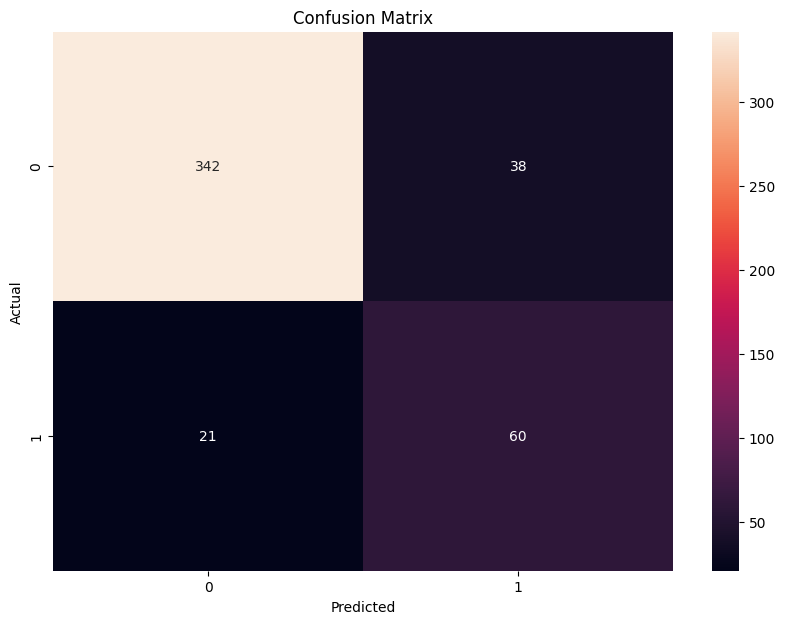

In [65]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()



In [66]:
import joblib
joblib.dump(model, 'balanced-model.pkl')

['balanced-model.pkl']

In [67]:
new_df['Teeth'].max(),new_df['Teeth'].min()

(4, 0)

In [68]:
new_df.head()

,Blood_pressure,Scars,Underlying_condition,Toxicology,Teeth,Height,Weight
0,1,2,0,1,2,5.4,70
1,1,2,1,0,0,5.9,65
2,1,2,0,0,2,5.9,55
3,1,2,0,0,0,5.9,60
4,1,2,0,1,2,5.9,65


In [69]:
df.head()

,Number,Gender,Age,Height,Weight,Eyes,Nose,Teeth,Scars,Limbs,...,Leadership,Obedience,Courage,Aptitude_Test,Oral_Interview,Blood_pressure,Toxicology,Underlying_condition,Selected,Year
0,1,1,20,5.4,70,1,1,2,2,1,...,60,55,75,85,85,1,1,0,0,2022
1,2,1,20,5.9,65,1,1,0,2,1,...,80,75,50,70,80,1,0,1,0,2022
2,3,1,19,5.9,55,1,1,2,2,1,...,75,70,65,85,70,1,0,0,1,2022
3,4,1,18,5.9,60,1,1,0,2,1,...,85,90,55,65,55,1,0,0,0,2022
4,5,1,19,5.9,65,1,1,2,2,1,...,75,50,80,85,50,1,1,0,0,2022


In [70]:
df[df['Selected'] ==1]

,Number,Gender,Age,Height,Weight,Eyes,Nose,Teeth,Scars,Limbs,...,Leadership,Obedience,Courage,Aptitude_Test,Oral_Interview,Blood_pressure,Toxicology,Underlying_condition,Selected,Year
2,3,1,19,5.9,55,1,1,2,2,1,...,75,70,65,85,70,1,0,0,1,2022
6,7,1,24,6.1,70,1,1,2,2,1,...,60,70,80,85,70,1,0,0,1,2022
8,9,1,20,6.1,60,1,1,2,2,1,...,85,65,75,85,80,1,0,0,1,2022
13,14,1,23,5.8,65,1,1,2,2,1,...,70,60,65,70,80,1,0,0,1,2022
14,15,1,23,5.7,65,1,1,2,2,1,...,60,70,65,65,65,1,0,0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,739,0,20,5.6,50,2,2,2,2,2,...,75,60,70,80,90,1,0,0,1,2020
2293,740,0,20,5.2,51,2,2,2,2,2,...,60,80,80,85,90,1,0,0,1,2020
2300,747,0,21,5.4,50,2,2,2,2,2,...,75,80,85,90,75,1,0,0,1,2020
2302,749,0,20,5.0,50,2,2,2,2,2,...,70,70,75,70,80,1,0,0,1,2020
